<a href="https://colab.research.google.com/github/BinaryBeast-007/Solution-of-the-Falkner-Skan-equation-Boundary-Layer-Theory-using-the-Shooting-Method./blob/main/Skan_Equation_Shooting%20method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f(eta_max) = 0.26218662417933564


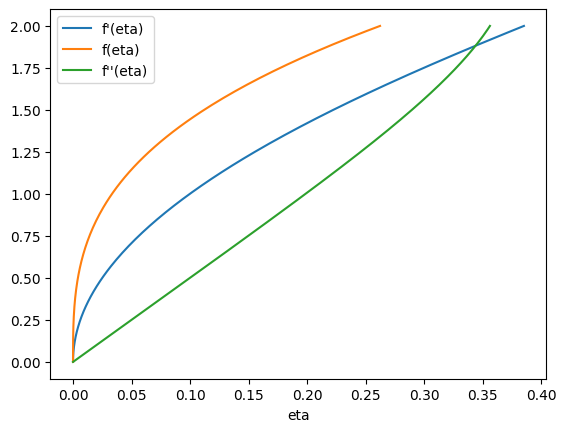

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# Falkner-Skan equation
def falkner_skan(eta, y, beta):
    f, f_prime, f_double_prime = y
    f_triple_prime = -f*f_double_prime - beta*(1 - f**2)
    return [f_prime, f_double_prime, f_triple_prime]

# shooting method
def shooting_method(beta, f_prime_guess, eta_max, h):
    # Define the grid
    eta_grid = np.arange(0, eta_max+h, h)
    # Set the initial values
    f_0 = 0
    f_prime_0 = f_prime_guess
    f_double_prime_0 = -beta*f_0
    y0 = [f_0, f_prime_0, f_double_prime_0]
    # Define the boundary condition
    def boundary_condition(ya, yb):
        return yb[1] - 1
    boundary_condition.terminal = True
    # Solve the Falkner-Skan equation using the shooting method
    solution = solve_ivp(lambda eta, y: falkner_skan(eta, y, beta), [eta_grid[0], eta_grid[-1]], y0, t_eval=eta_grid, method='RK45', events=boundary_condition)
    return solution.y[0], solution.y[1], solution.y[2]

beta = -0.1998
f_prime_guess = 0
eta_max = 2
h = 0.01
f, f_prime, f_double_prime = shooting_method(beta, f_prime_guess, eta_max, h)

print('f(eta_max) =', f[-1])

import matplotlib.pyplot as plt


plt.plot(f_prime, np.linspace(0, eta_max, len(f_prime)), label="f'(eta)")
plt.plot(f, np.linspace(0, eta_max, len(f)), label="f(eta)")
plt.plot(f_double_prime, np.linspace(0, eta_max, len(f_double_prime)), label="f''(eta)")
plt.legend()
plt.xlabel("eta")
plt.show()